In [1]:
import csv

In [2]:
import pandas as pd

In [3]:
path = "../sparse/"

In [57]:
results_df = pd.read_csv(path+'pretraining_output-100k/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,53,53,11,2,6,111,127,7,576,1142,...,0,0,0,0,0,0,0,0,0,0
1,38,38,8,2,139,25,387,81,38,25,...,0,0,0,0,0,0,0,0,0,0
2,206,206,9,2,6,44,426,104,25,237,...,0,0,0,0,0,0,0,0,0,0
3,25,25,30,2,6,53,25,25,426,237,...,0,0,0,0,0,0,0,0,0,0
4,289,289,11,2,6,44,25,140,43,237,...,0,0,0,0,0,0,0,0,0,0
5,25,25,6,2,7,576,111,678,53,4,...,0,0,0,0,0,0,0,0,0,0
6,1142,1142,16,2,53,1142,193,25,253,426,...,0,0,0,0,0,0,0,0,0,0
7,25,25,14,2,398,253,426,426,426,426,...,0,0,0,0,0,0,0,0,0,0
8,53,53,34,2,57,58,59,107,59,42,...,0,0,0,0,0,0,0,0,0,0
9,25,25,12,2,398,38,38,53,1142,50,...,0,0,0,0,0,0,0,0,0,0


In [58]:
vocab_df = pd.read_csv(path+'/vocab-code.txt', header=None)
vocab_df.shape

(1156, 1)

In [59]:
vocab_df2 = pd.read_csv('../../bert-cmp/bert/vocab-code.txt', header=None)
vocab_df2.shape

(1146, 1)

In [60]:
set(vocab_df[0]) - set(vocab_df2[0])

{'[cls]',
 'accuracy',
 'batches',
 'categorical',
 'cw',
 'existing',
 'lengths',
 'modes',
 'ref',
 'score',
 'suffix'}

In [61]:
len(vocab_df)

1156

In [62]:
accuracy = 0

In [63]:
per_token_acc = {}; per_token_count = {}

In [64]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if per_token_acc.get(label, None) == None:
        per_token_acc[label] = 0
        per_token_count[label] = 0
    per_token_acc[label] += int(prediction == label)
    per_token_count[label] += 1
    accuracy += int(prediction == label)
    #print("Predicted --", prediction)
    #print("Label     --", label)
    #print()

In [65]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(results_df)

In [66]:
import matplotlib.pyplot as plt

In [67]:
from collections import Counter
import numpy as np

In [68]:
c = Counter(total_per_token_accuracy)
c.most_common(1000)

[('predictions', 1.0),
 ('withitem', 1.0),
 ('units', 1.0),
 ('random', 1.0),
 ('total', 1.0),
 ('inferreddimension', 1.0),
 ('toarray', 1.0),
 ('stop', 1.0),
 ('enqueuer', 1.0),
 ('preprocess', 1.0),
 ('subscript', 1.0),
 ('val', 1.0),
 ('get', 1.0),
 ('with', 1.0),
 ('asarray', 1.0),
 ('cudnn', 1.0),
 ('support', 1.0),
 ('original', 1.0),
 ('dense', 1.0),
 ('last', 1.0),
 ('values', 1.0),
 ('schedule', 1.0),
 ('rows', 1.0),
 ('unaryop', 1.0),
 ('co', 1.0),
 ('summary', 1.0),
 ('generatorexp', 1.0),
 ('spatial', 1.0),
 ('backwards', 1.0),
 ('log', 1.0),
 ('create', 1.0),
 ('histogram', 1.0),
 ('cell', 1.0),
 ('depthwise', 1.0),
 ('iterations', 1.0),
 ('multiplier', 1.0),
 ('phase', 1.0),
 ('convert', 1.0),
 ('usub', 1.0),
 ('lambda', 1.0),
 ('compare', 1.0),
 ('dilation', 1.0),
 ('dimshuffle', 1.0),
 ('logs', 1.0),
 ('ref', 1.0),
 ('queue', 1.0),
 ('version', 1.0),
 ('start', 1.0),
 ('dim', 1.0),
 ('initializer', 1.0),
 ('fields', 1.0),
 ('non', 1.0),
 ('initial', 1.0),
 ('string', 1.

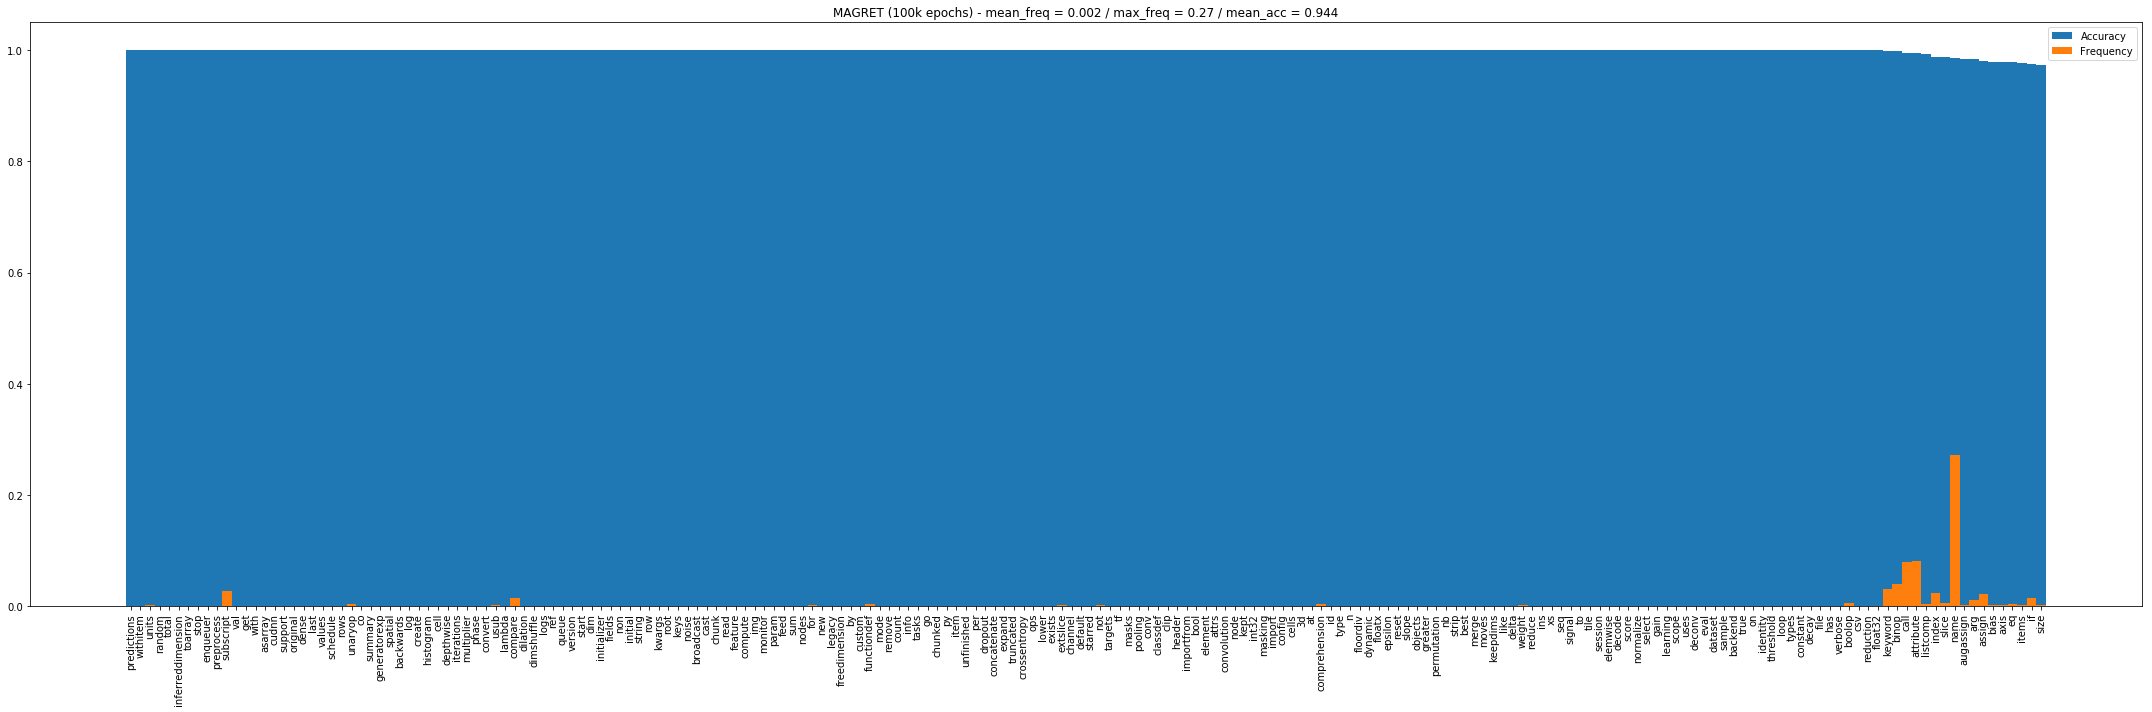

In [69]:
plt.figure(figsize=(30,10))
labels, values = zip(*c.most_common(200))

indexes = np.arange(len(labels))
width = 1

freqs = [per_token_freq[l] for l in labels]

mean_freq = np.mean(list(per_token_freq.values()))
mean_acc = (accuracy / len(results_df))

plt.bar(indexes, values, width, label='Accuracy')
plt.bar(indexes, freqs, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET (100k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('MAGRET-100k_epochs_top200.pdf')
plt.show()

In [70]:
pred = list(results_df.loc[10][3:])
pred

[2,
 53,
 1142,
 309,
 310,
 25,
 655,
 53,
 1142,
 22,
 25,
 25,
 655,
 319,
 655,
 25,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [71]:
pred_str = [vocab_df.loc[i][0] for i in pred]

In [72]:
pred_str

['[CLS]',
 'call',
 'attribute',
 'random',
 'normal',
 'name',
 'keyword',
 'call',
 'attribute',
 'shape',
 'name',
 'name',
 'keyword',
 'num',
 'keyword',
 'name',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [73]:
d = Counter(per_token_freq)
d.most_common(100)

[('name', 0.2721015514809591),
 ('attribute', 0.08205923836389281),
 ('call', 0.07906911142454161),
 ('num', 0.048236953455571226),
 ('str', 0.04050775740479549),
 ('binop', 0.0402820874471086),
 ('keyword', 0.03015514809590973),
 ('subscript', 0.026516220028208744),
 ('index', 0.02386459802538787),
 ('assign', 0.022736248236953454),
 ('add', 0.015853314527503527),
 ('compare', 0.01545839210155148),
 ('if', 0.014950634696755994),
 ('tuple', 0.012468265162200282),
 ('nameconstant', 0.010578279266572637),
 ('arg', 0.010267983074753174),
 ('shape', 0.009506346967559944),
 ('return', 0.008011283497884344),
 ('list', 0.00691114245416079),
 ('slice', 0.006488011283497884),
 ('expr', 0.006346967559943582),
 ('arguments', 0.005133991537376587),
 ('boolop', 0.004880112834978844),
 ('raise', 0.0046262341325811005),
 ('listcomp', 0.004456981664315938),
 ('unaryop', 0.0043723554301833565),
 ('x', 0.004231311706629055),
 ('mult', 0.004146685472496474),
 ('eq', 0.004033850493653033),
 ('comprehensio

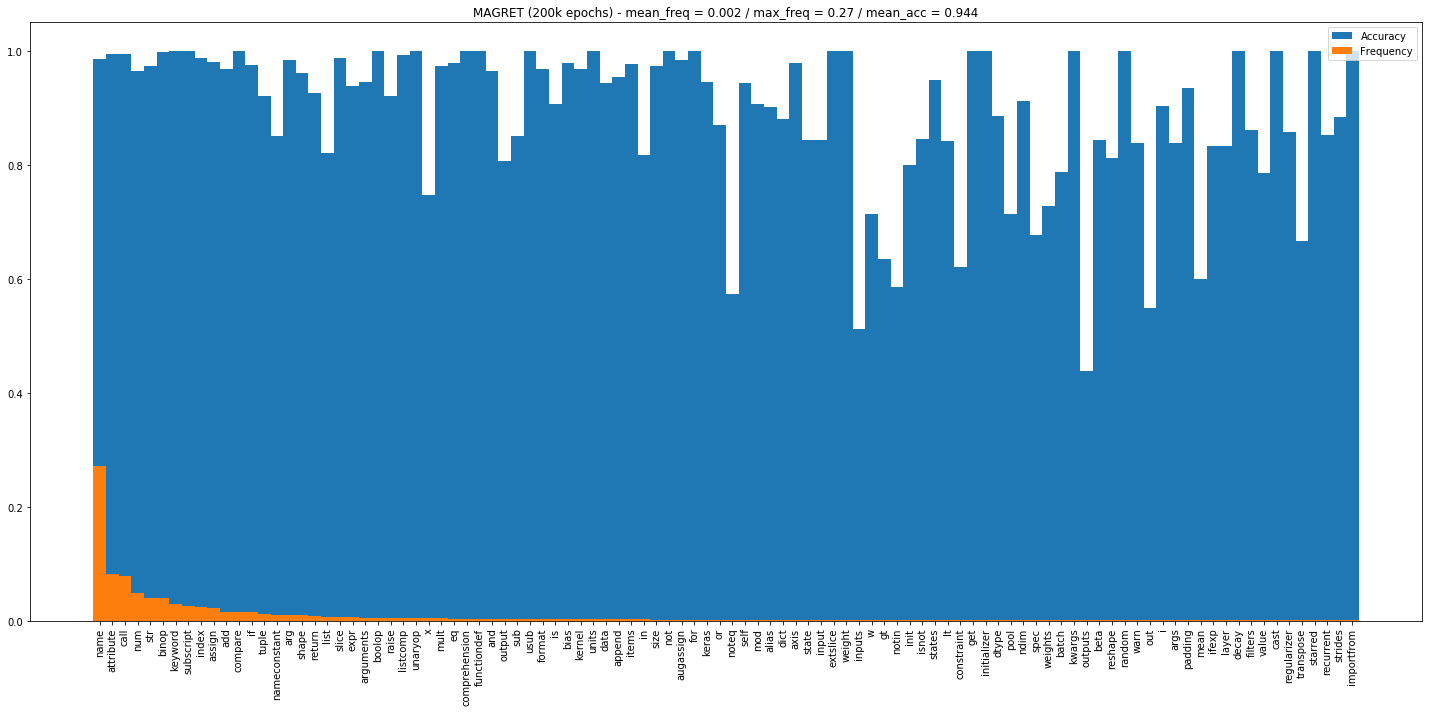

In [74]:
plt.figure(figsize=(20,10))
labels, values = zip(*d.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET (200k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('MAGRET-freq-100k_epochs_top100.png')
plt.show()

In [75]:
confusion = {}

In [76]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if confusion.get(label, None) == None:
        confusion[label] = []
    if prediction != label:
        confusion[label].append(prediction)

In [77]:
confusion_counter = {c: Counter(confusion[c]) for c in confusion}

In [78]:
confusion_counter

{'1': Counter({'mask': 1}),
 '2': Counter({'1': 3}),
 '2d': Counter({'3d': 10}),
 '3d': Counter(),
 'a': Counter({'axis': 3, 'output': 2, 'x': 2}),
 'abs': Counter({'square': 5}),
 'accuracy': Counter({'crossentropy': 2}),
 'activation': Counter({'square': 2}),
 'add': Counter({'div': 1, 'mod': 1, 'mult': 8, 'sub': 8}),
 'alias': Counter({'identity': 3, 'max': 1, 'name': 1}),
 'all': Counter({'reshape': 4}),
 'alpha': Counter({'axis': 2, 'l1': 1, 'log': 2}),
 'and': Counter({'or': 4}),
 'append': Counter({'items': 3, 'zeros': 1}),
 'arange': Counter({'flatten': 5}),
 'arg': Counter({'self': 6}),
 'argmax': Counter({'mean': 1}),
 'argmin': Counter({'argmax': 3}),
 'args': Counter({'kwargs': 5}),
 'arguments': Counter({'arange': 1, 'name': 6, 'shape': 2, 'stateful': 1}),
 'array': Counter({'test': 2}),
 'as': Counter({'is': 2}),
 'asarray': Counter(),
 'assign': Counter({'asarray': 1,
          'call': 7,
          'for': 2,
          'get': 2,
          'keyword': 2,
          'range': 

In [79]:
for key, c in confusion_counter.items():
    print("Label -- ", key)
    print('Preds -- ',' '.join(["{} ({})".format(c0, c1) for c0,c1 in c.most_common(5)]))
    print()

Label --  gradients
Preds --  foldr (2)

Label --  ops
Preds --  

Label --  sequence
Preds --  iterations (4) ndim (1) axis (1)

Label --  predictions
Preds --  

Label --  from
Preds --  to (3) shape (1) name (1) group (1)

Label --  pad
Preds --  width (2) transpose (2) img (1)

Label --  3d
Preds --  

Label --  updates
Preds --  losses (7) kwargs (3) float32 (1)

Label --  gamma
Preds --  depthwise (3) alpha (2) pointwise (2) iterations (1)

Label --  withitem
Preds --  

Label --  startswith
Preds --  warn (1)

Label --  units
Preds --  

Label --  expanduser
Preds --  join (3)

Label --  accuracy
Preds --  crossentropy (2)

Label --  class
Preds --  layer (3) sample (1)

Label --  or
Preds --  and (7)

Label --  generator
Preds --  dropout (1)

Label --  transpose
Preds --  convolution (3) asarray (3) reshape (2) x (1)

Label --  outputs
Preds --  states (8) output (7) kwargs (3)

Label --  built
Preds --  trainable (4) layers (1)

Label --  spatialdropout1d
Preds --  dim (1)

L

Preds --  

Label --  global
Preds --  name (1)

Label --  tile
Preds --  

Label --  monitor
Preds --  

Label --  argmax
Preds --  mean (1)

Label --  param
Preds --  

Label --  session
Preds --  

Label --  feed
Preds --  

Label --  index
Preds --  slice (7) on (2) in (1)

Label --  elemwise
Preds --  

Label --  decode
Preds --  

Label --  listcomp
Preds --  generatorexp (1)

Label --  u
Preds --  mean (1) mask (1) out (1)

Label --  col
Preds --  ndarray (1)

Label --  write
Preds --  resize (2) ctc (1) default (1)

Label --  h5py
Preds --  flag (1) target (1)

Label --  model
Preds --  layer (6)

Label --  nn
Preds --  cell (1)

Label --  w
Preds --  x (8) b (2) bias (1) left (1)

Label --  rows
Preds --  

Label --  methods
Preds --  pooling1d (1)

Label --  lambda
Preds --  

Label --  final
Preds --  enqueuer (1) metrics (1)

Label --  frombuffer
Preds --  constant (1)

Label --  deconv
Preds --  

Label --  update
Preds --  v (1) loss (1) x (1)

Label --  run
Preds --  fun

In [80]:
token_names = ["Module","Interactive","Expression","Suite","FunctionDef","AsyncFunctionDef","ClassDef","Return","Delete","Assign","AugAssign","For","AsyncFor","While","If","With","AsyncWith","Raise","Try","Assert","Import","ImportFrom","Global","Nonlocal","Expr","Pass","Break","Continue","BoolOp","BinOp","UnaryOp","Lambda","IfExp","Dict","Set","ListComp","SetComp","DictComp","GeneratorExp","Await","Yield","YieldFrom","Compare","Call","Num","Str","FormattedValue","JoinedStr","Bytes","NameConstant","Ellipsis","Constant","Attribute","Subscript","Starred","Name","List","Tuple","Load","Store","Del","AugLoad","AugStore","Param","Slice","ExtSlice","Index","And","Or","Add","Sub","Mult","MatMult","Div","Mod","Pow","LShift","RShift","BitOr","BitXor","BitAnd","FloorDiv","Invert","Not","UAdd","USub","Eq","NotEq","Lt","LtE","Gt","GtE","Is","IsNot","In","NotIn","excepthandler","ExceptHandler","arguments","arg","keyword","alias","withitem","comprehension"]
token_names = [t.lower() for t in token_names]

In [81]:
def is_ast_token(t):
    return t in token_names

In [82]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_ast_token(prediction) == is_ast_token(label)
    #if prediction != label:
    if right:
        mistaken[label]['correct'] += 1
        tot_right += 1
    else:
        mistaken[label]['wrong'] += 1
        tot_wrong += 1

In [83]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.9966995768688294, 0.003300423131170663)

In [84]:
MOD_SYMBOLS = ["Module", "Interactive", "Expression", "Suite"]
STMT_SYMBOLS = ["FunctionDef", "AsyncFunctionDef", "ClassDef", "Return", "Delete", \
                "Assign", "AugAssign", "For", "AsyncFor", "While", "If", "With", "AsyncWith", \
                "Raise", "Try", "Assert", "Import", "ImportFrom", "Global", "Nonlocal", \
                "Expr", "Pass", "Break", "Continue"]
EXPR_SYMBOLS = ["BoolOp", "BinOp", "UnaryOp", "Lambda", "IfExp", "Dict", "Set", "ListComp", \
                "SetComp", "DictComp", "GeneratorExp", "Await", "Yield", "YieldFrom", \
                "Compare", "Call", "Num", "Str", "FormattedValue", "JoinedStr", "Bytes", \
                "NameConstant", "Ellipsis", "Constant", "Attribute", "Subscript", \
                "Starred", "Name", "List", "Tuple"]
EXPR_CONTENT_SYMBOLS = ["Load", "Store", "Del", "AugLoad", "AugStore", "Param"]
SLICE_SYMBOLS = ["Slice", "ExtSlice", "Index"]
BOOLOP_SYMBOLS = ["And", "Or"]
OPERATOR_SYMBOLS = ["Add", "Sub", "Mult", "MatMult", "Div", "Mod", "Pow", "LShift", "RShift", \
                    "BitOr", "BitXor", "BitAnd", "FloorDiv"]
UNARYOP_SYMBOLS = ["Invert", "Not", "UAdd", "USub"]
CMPOP_SYMBOLS = ["Eq", "NotEq", "Lt", "LtE", "Gt", "GtE", "Is", "IsNot", "In", "NotIn"]
COMPREHENSION_SYMBOLS = ["comprehension"]
EXCEPT_SYMBOLS = ["excepthandler", "ExceptHandler"]
ARG_SYMBOLS = ["arguments", "arg", "keyword"]
IMPORT_SYMBOLS = ["alias", "withitem"]

In [85]:
def to_lower(l):
    return [l_.lower() for l_ in l]

In [86]:
MOD_SYMBOLS = to_lower(MOD_SYMBOLS)
STMT_SYMBOLS = to_lower(STMT_SYMBOLS)
EXPR_SYMBOLS = to_lower(EXPR_SYMBOLS)
EXPR_CONTENT_SYMBOLS = to_lower(EXPR_CONTENT_SYMBOLS)
SLICE_SYMBOLS = to_lower(SLICE_SYMBOLS)
BOOLOP_SYMBOLS = to_lower(BOOLOP_SYMBOLS)
OPERATOR_SYMBOLS = to_lower(OPERATOR_SYMBOLS)
UNARYOP_SYMBOLS = to_lower(UNARYOP_SYMBOLS)
CMPOP_SYMBOLS = to_lower(CMPOP_SYMBOLS)
COMPREHENSION_SYMBOLS = to_lower(COMPREHENSION_SYMBOLS)
EXCEPT_SYMBOLS = to_lower(EXCEPT_SYMBOLS)
ARG_SYMBOLS = to_lower(ARG_SYMBOLS)
IMPORT_SYMBOLS = to_lower(IMPORT_SYMBOLS)

In [87]:
def get_token_class_id(t):
    if t in MOD_SYMBOLS: return 0
    if t in STMT_SYMBOLS: return 1
    if t in EXPR_SYMBOLS: return 2
    if t in EXPR_CONTENT_SYMBOLS: return 3
    if t in SLICE_SYMBOLS: return 4
    if t in BOOLOP_SYMBOLS: return 5
    if t in OPERATOR_SYMBOLS: return 6
    if t in UNARYOP_SYMBOLS: return 7
    if t in CMPOP_SYMBOLS: return 8
    if t in ARG_SYMBOLS: return 9
    if t in EXCEPT_SYMBOLS: return 10
    if t in COMPREHENSION_SYMBOLS: return 11
    if t in IMPORT_SYMBOLS: return 12
    else: return 13

In [88]:
def is_same_class(t0, t1):
    return get_token_class_id(t0) == get_token_class_id(t1)

In [89]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_same_class(prediction, label)
    #if prediction != label:
    if right:
        mistaken[label]['correct'] += 1
        tot_right += 1
    else:
        mistaken[label]['wrong'] += 1
        tot_wrong += 1

In [90]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.9928913963328632, 0.007108603667136813)

In [91]:
classes = ["MOD", "STMT", "EXPR", "EXPR_CONT", "SLICE", "BOOLOP", "OPERATOR", "UNARY", "CMPOP", "COMPR", "EXCEPT", "ARG", "IMPORT", "VAR"]

In [92]:
confusion_mat = np.zeros((14,14))
class_freqs = {str(i):0 for i in range(14)};
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    t0 = get_token_class_id(prediction)
    t1 = get_token_class_id(label)
    confusion_mat[t0][t1] += 1
    class_freqs[str(t1)] += 1

In [93]:
confusion_mat

array([[8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 2.275e+03, 4.700e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.000e+00, 4.900e+01, 2.305e+04, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 5.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00],
       [0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.117e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.690e+02,
        0.000e+00, 0.000e+00, 0

In [94]:
freqs = {k: v/len(results_df) for k,v in class_freqs.items()}
freqs

{'0': 0.00028208744710860365,
 '1': 0.06592383638928068,
 '10': 0.00039492242595204514,
 '11': 0.0038928067700987304,
 '12': 0.0016078984485190409,
 '13': 0.1472496473906911,
 '2': 0.6522143864598026,
 '3': 0.00022566995768688293,
 '4': 0.03159379407616361,
 '5': 0.004767277856135402,
 '6': 0.025952045133991537,
 '7': 0.004823695345557123,
 '8': 0.015514809590973202,
 '9': 0.045557122708039494}

In [95]:
np.sum(confusion_mat, axis=0)

array([1.0000e+01, 2.3370e+03, 2.3121e+04, 8.0000e+00, 1.1200e+03,
       1.6900e+02, 9.2000e+02, 1.7100e+02, 5.5000e+02, 1.6150e+03,
       1.4000e+01, 1.3800e+02, 5.7000e+01, 5.2200e+03])

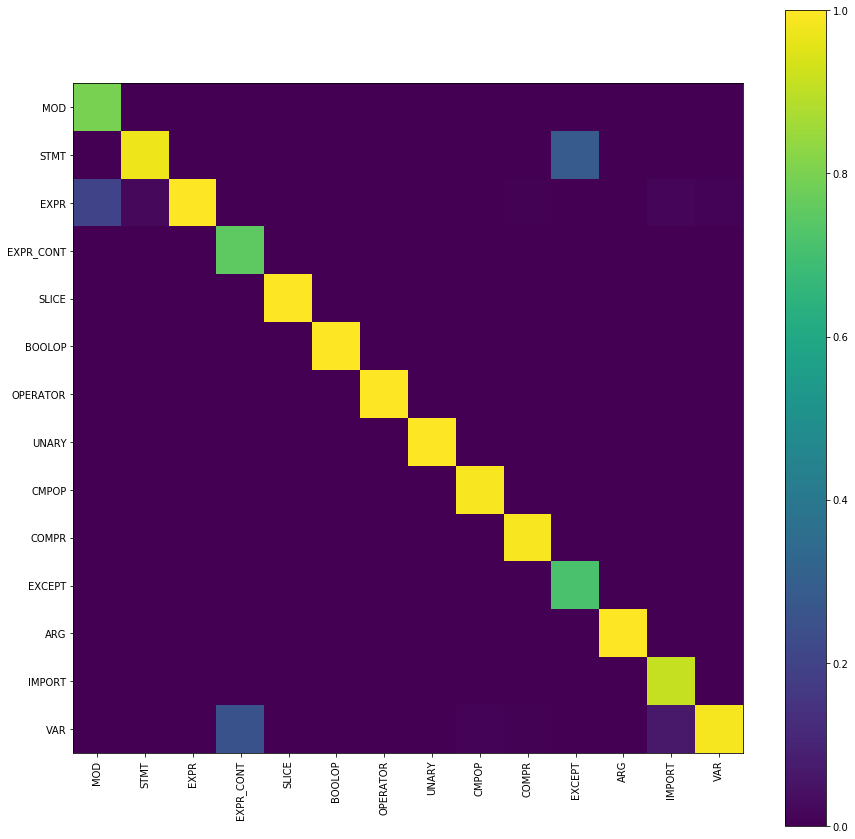

In [96]:
plt.figure(figsize=(15,15))
n = np.sum(confusion_mat, axis=0)
plt.imshow(confusion_mat / n)
plt.xticks(range(14), classes, rotation=90)
plt.yticks(range(14), classes)
plt.colorbar()

MOD 0.8 10 0.0
STMT 0.973 2337 0.066
EXPR 0.997 23121 0.652
EXPR_CONT 0.75 8 0.0
SLICE 0.997 1120 0.032
BOOLOP 1.0 169 0.005
OPERATOR 1.0 920 0.026
UNARY 1.0 171 0.005
CMPOP 0.991 550 0.016
COMPR 0.989 1615 0.046
EXCEPT 0.714 14 0.0
ARG 1.0 138 0.004
IMPORT 0.912 57 0.002
VAR 0.984 5220 0.147


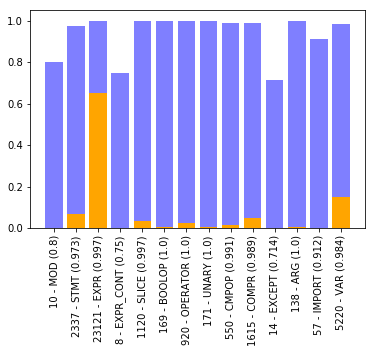

In [97]:
n = np.sum(confusion_mat, axis=0)
normed = confusion_mat / n
for i in range(14):
    plt.bar(classes[i], np.around(normed[i][i],3), color='b', alpha=0.5)
    plt.bar(classes[i], np.around(freqs[str(i)],3), color='orange')
    print(classes[i], np.around(normed[i][i],3), class_freqs[str(i)], np.around(freqs[str(i)],3))
plt.xticks(range(14), [str(class_freqs[str(i)])+" - "+c + " (" + str(np.around(normed[i][i],3)) + ")" for i,c in enumerate(classes)], rotation=90);

In [98]:
[freqs[str(i)]*normed[i][i] for i in range(14)]

[0.00022566995768688293,
 0.06417489421720733,
 0.6502115655853314,
 0.0001692524682651622,
 0.03150916784203103,
 0.004767277856135402,
 0.025952045133991537,
 0.004823695345557123,
 0.015373765867418902,
 0.045077574047954865,
 0.0002820874471086037,
 0.0038928067700987304,
 0.001466854724964739,
 0.14496473906911142]

In [99]:
from sklearn.metrics import f1_score

In [100]:
preds = []; labels = []
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    t0 = get_token_class_id(prediction)
    t1 = get_token_class_id(label)
    preds.append(prediction)
    labels.append(label)

In [101]:
f1_score(labels, preds, average='micro')

0.9444005641748943

In [102]:
f1_score(labels, preds, average='macro')

0.5440963611536793

In [103]:
f1_score(labels, preds, average='weighted')

0.9405293562210962